In [19]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as optim
import tensorflow as tf
import datetime, os
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Network

# conv, relu, pooling, flatten, fully connected, softmax

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10))

In [22]:
model.compile(optimizer=optim.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])


Epoch 1/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7274 - accuracy: 0.3826 - val_loss: 1.5162 - val_accuracy: 0.4601
Epoch 2/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4522 - accuracy: 0.4857 - val_loss: 1.4333 - val_accuracy: 0.4885
Epoch 3/100
1563/1563 [==============================] - 20s 12ms/step - loss: 1.3564 - accuracy: 0.5228 - val_loss: 1.3587 - val_accuracy: 0.5249
Epoch 4/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2822 - accuracy: 0.5528 - val_loss: 1.3114 - val_accuracy: 0.5432
Epoch 5/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2213 - accuracy: 0.5755 - val_loss: 1.2153 - val_accuracy: 0.5763
Epoch 6/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1731 - accuracy: 0.5897 - val_loss: 1.1754 - val_accuracy: 0.5876
Epoch 7/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1315 - accuracy: 0.6055 - val_loss: 1

1563/1563 [==============================] - 20s 13ms/step - loss: 0.4764 - accuracy: 0.8415 - val_loss: 0.9246 - val_accuracy: 0.6989
Epoch 57/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4678 - accuracy: 0.8451 - val_loss: 0.9113 - val_accuracy: 0.7033
Epoch 58/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4606 - accuracy: 0.8484 - val_loss: 0.9122 - val_accuracy: 0.7080
Epoch 59/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4514 - accuracy: 0.8522 - val_loss: 0.9168 - val_accuracy: 0.7048
Epoch 60/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4436 - accuracy: 0.8551 - val_loss: 0.9187 - val_accuracy: 0.7071
Epoch 61/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4354 - accuracy: 0.8568 - val_loss: 0.9500 - val_accuracy: 0.6998
Epoch 62/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.4302 - accuracy: 0.8598 - val_loss: 0.9366 

313/313 - 2s - loss: 1.2248 - accuracy: 0.6850


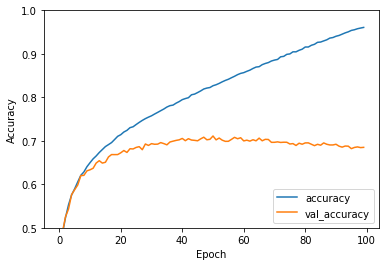

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [24]:
from shutil import make_archive
make_archive('results.zip', 'zip', "20220408-085457")

'/root/results.zip.zip'